In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from scipy.cluster.hierarchy import dendrogram, linkage

import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
df_train = pd.read_csv('./Datasets/clean_train_data.csv')
df_test = pd.read_csv('./Datasets/clean_test_data.csv')

In [3]:
df_train.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,...,extraction_type_class,management,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,...,gravity,vwc,user-group,pay annually,good,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,...,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,...,gravity,vwc,user-group,pay per bucket,good,enough,dam,surface,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,...,submersible,vwc,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,...,gravity,other,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional


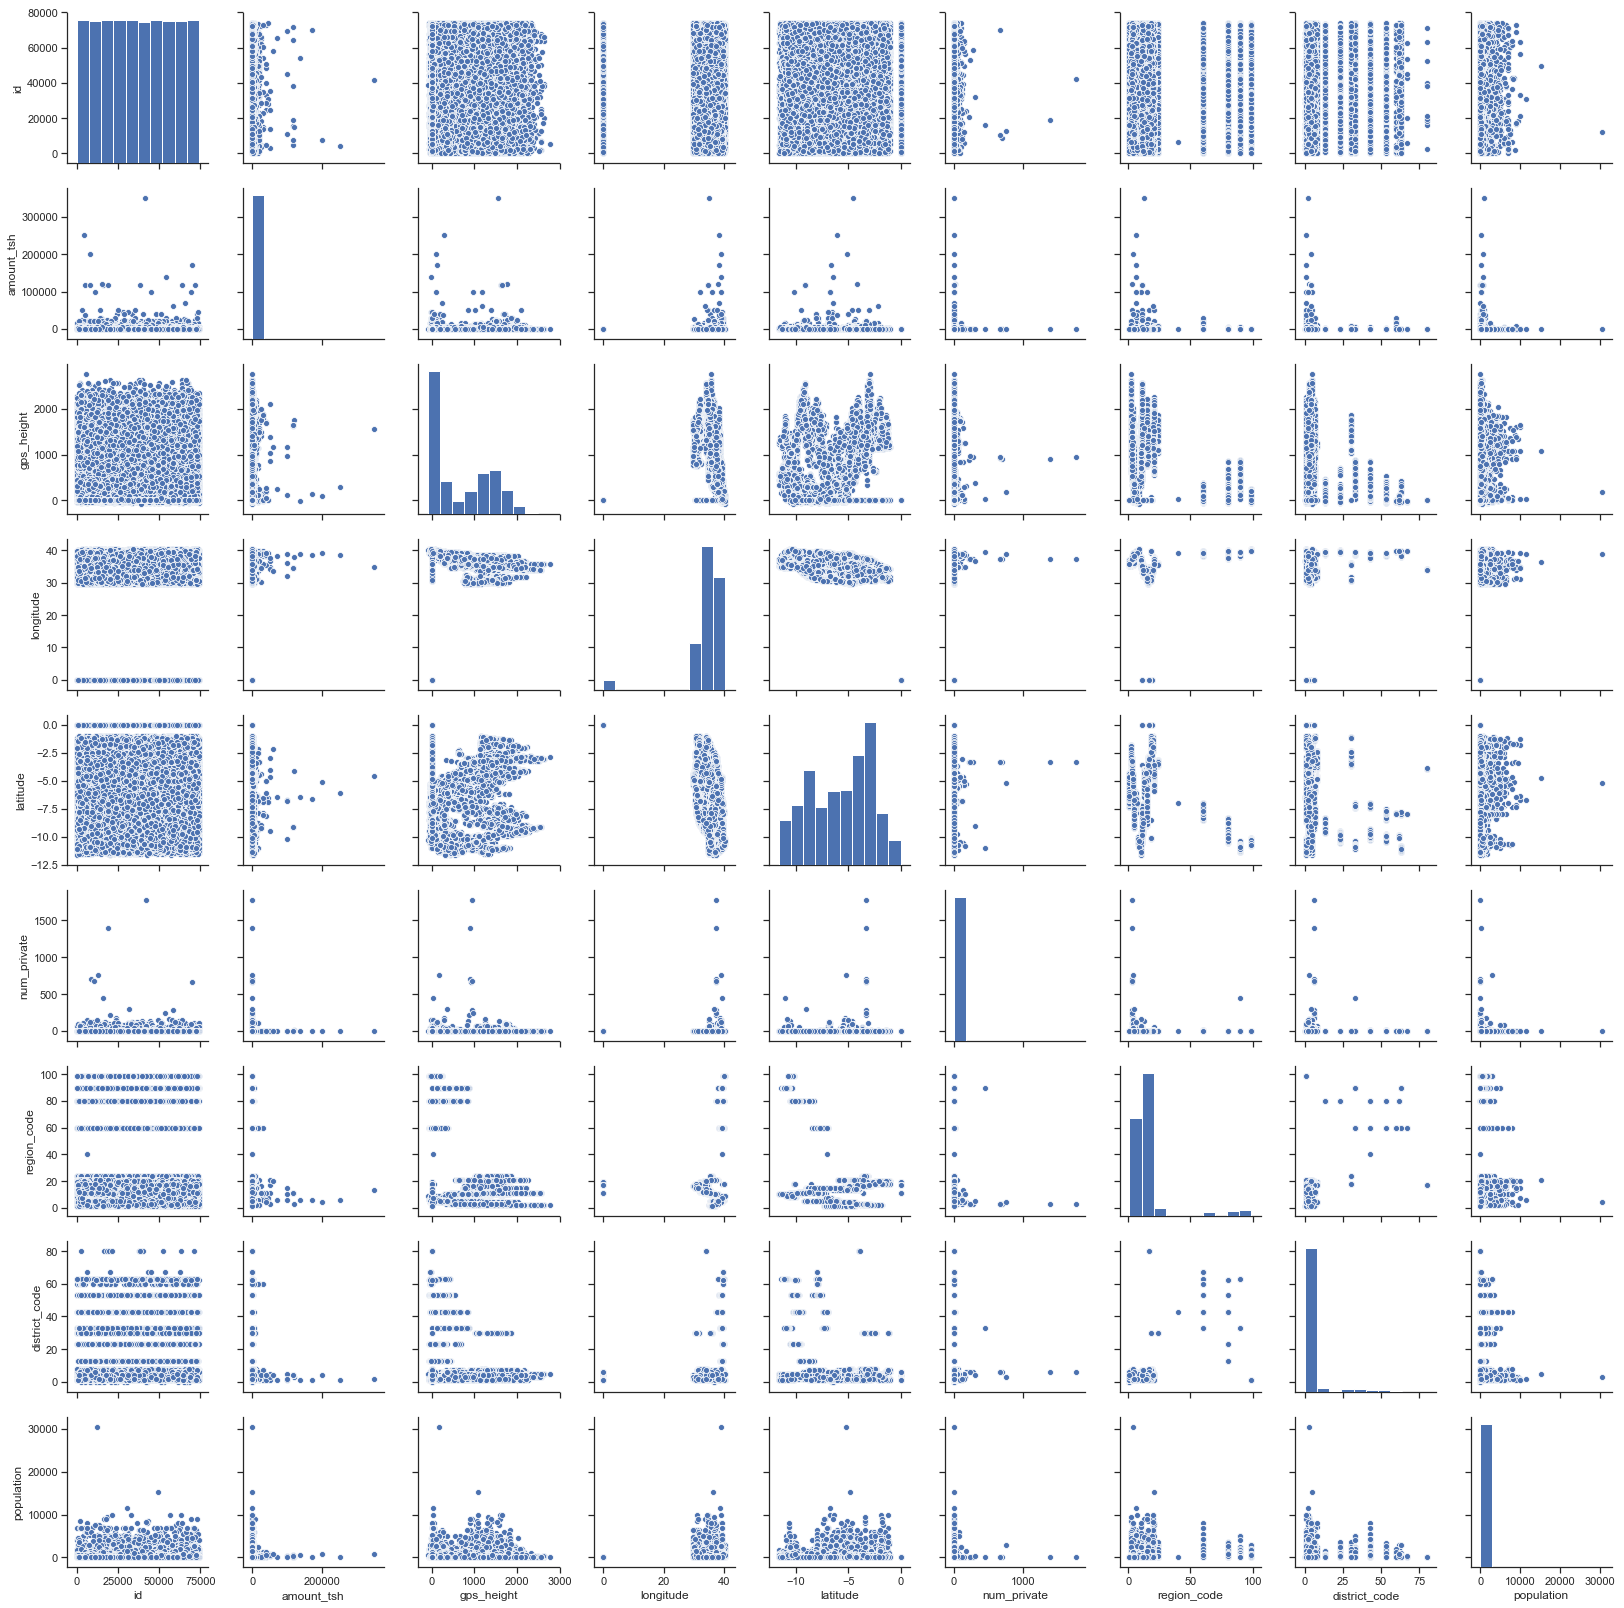

In [4]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_train)

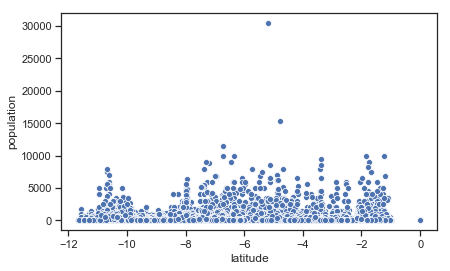

In [6]:
# Scatter Plot of Population compared to Latitude.
sns.set(style="ticks", color_codes=True)
sns.scatterplot(df_train['latitude'], df_train['population'])

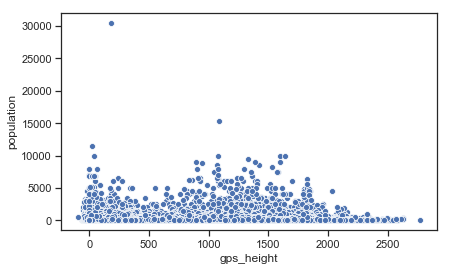

In [7]:
# Scatter Plot of Population compared to Height above sea level.  
sns.set(style="ticks", color_codes=True)
sns.scatterplot(df_train['gps_height'], df_train['population'])

In [8]:
# Print the value counts for categorical columns
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df_train[col].value_counts())


Column Name: date_recorded
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
2011-03-11    426
2013-01-30    421
2013-02-16    418
2011-03-23    417
2011-03-09    416
2013-01-18    409
2013-02-26    391
2011-03-30    391
2011-03-24    381
2013-03-19    381
2013-02-13    380
2011-03-12    379
2013-01-23    379
2011-03-03    378
2013-01-28    376
             ... 
2004-01-07      1
2002-10-14      1
2004-03-06      1
2011-09-06      1
2011-08-30      1
2011-09-16      1
2013-12-01      1
2012-01-21      1
2011-09-15      1
2011-09-26      1
2011-09-13      1
2011-09-23      1
2011-09-27      1
2011-09-18      1
2011-09-20      1
2013-01-06      1
2011-09-11      1
2011-09-01      1
2011-09-08      1
2011-09-28      1
2013-01-01      1
2011-09-12      1
2004-06-01      1


never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

Column Name: quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Column Name: quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

Column Name: source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

Column Name: source_class
groundwater    45794
surface        13328
unknow

In [9]:
df_train.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [10]:
# Create a new column to explore what variables in columns have more 
# functional or more broken and non functional pumps.

replace_values = {'functional':2, 'functional needs repair':1,
                   'non functional':0}

df_train['status_values']  = df_train.status_group.replace(replace_values)

In [11]:
df_train['status_values'].head()

0    2
1    2
2    2
3    0
4    2
Name: status_values, dtype: int64

In [12]:
# See what basin area has the most functional and lest functional pumps
piv = pd.pivot_table(df_train, index=['basin', 'status_group'],
                           values=['status_values'], aggfunc='count')
piv

status_values
basin                   status_group                          
Internal                functional                        4482
                        functional needs repair            557
                        non functional                    2746
Lake Nyasa              functional                        3324
                        functional needs repair            250
                        non functional                    1511
Lake Rukwa              functional                        1000
                        functional needs repair            270
                        non functional                    1184
Lake Tanganyika         functional                        3107
                        functional needs repair            742
                        non functional                    2583
Lake Victoria           functional                        5100
                        functional needs repair            989
                        non functional                    4159
Pangani                 functional                        5372
                        functional needs repair            477
                        non functional                    3091
Rufiji                  functional                        5068
                        functional needs repair            437
                        non functional                    2471
Ruvuma / Southern Coast functional                        1670
                        functional needs repair            326
                        non functional                    2497
Wami / Ruvu             functional                        3136
                        functional needs repair            269
                        non functional                    2582

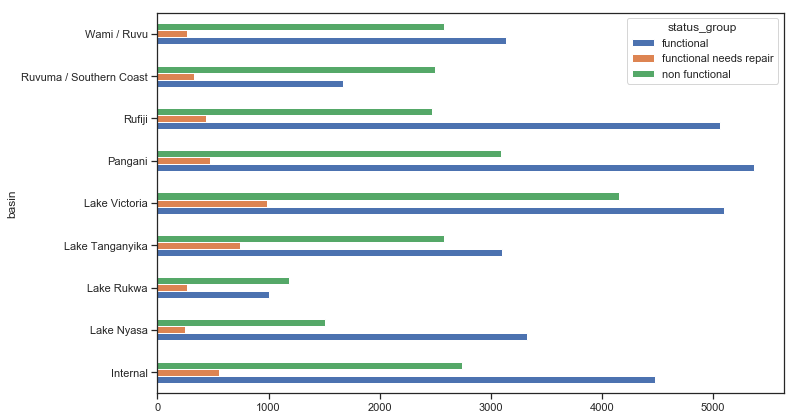

In [13]:
# Examine the functionality of pumps in different basins.
df_train.groupby('basin')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(figsize=(10,7))\

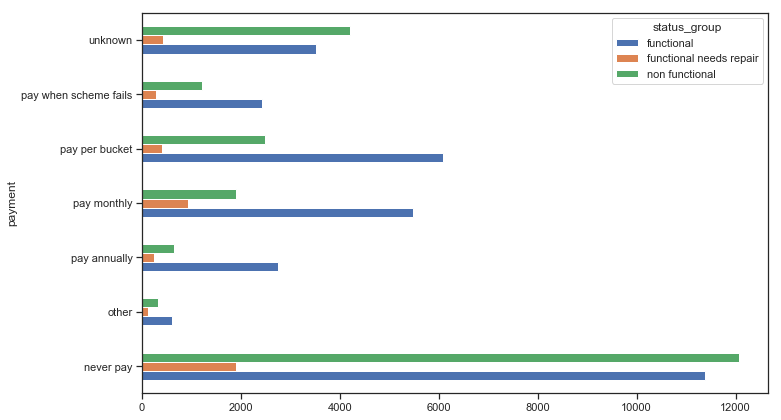

In [14]:
# Examine the functionality of pumps based on payment type.
df_train.groupby('payment')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(figsize=(10,7))\

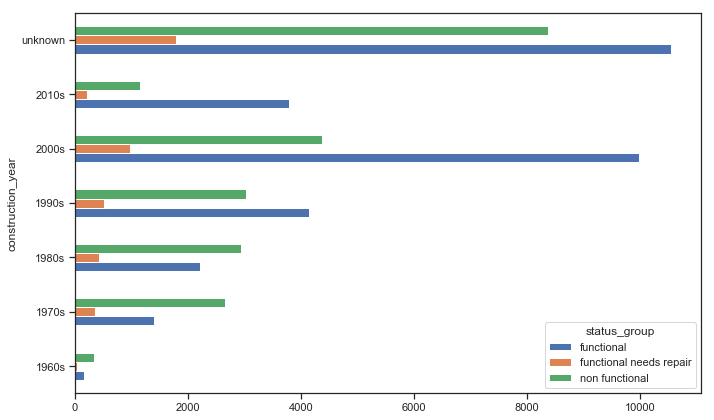

In [15]:
# 
df_train.groupby('construction_year')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(figsize=(10,7))\

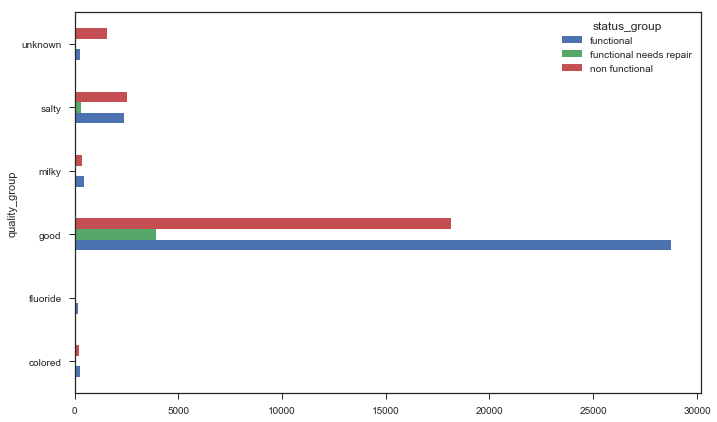

In [16]:
df_train.groupby('quality_group')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(figsize=(10,7))\

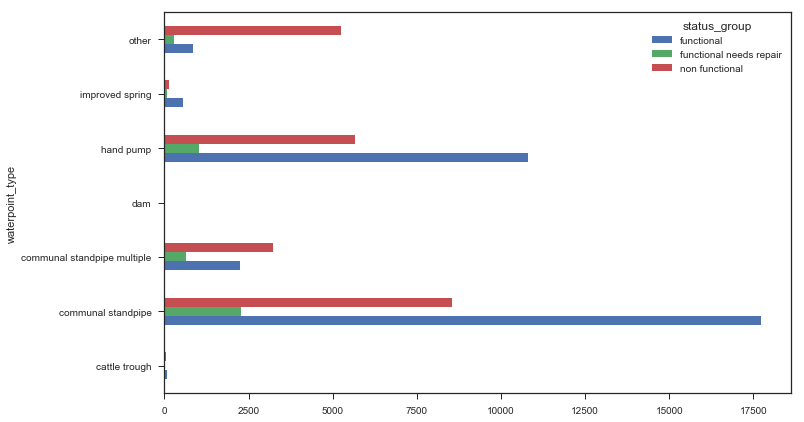

In [17]:
df_train.groupby('waterpoint_type')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(figsize=(10,7))\

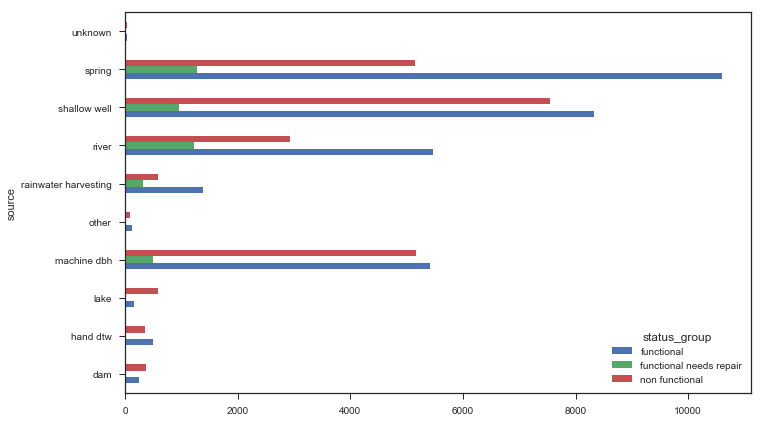

In [18]:
df_train.groupby('source')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(figsize=(10,7))\

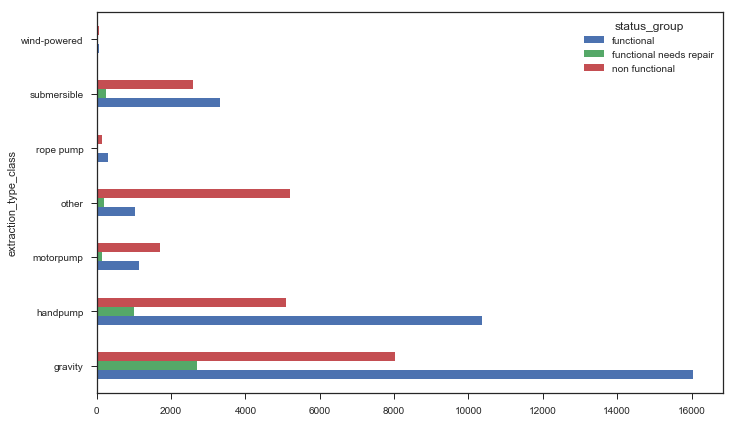

In [19]:
df_train.groupby('extraction_type_class')['status_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.barh(figsize=(10,7))\

In [20]:
df_train2.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(df_train2.date_recorded)
df_train2.columns = ['days_since_recorded' if x=='date_recorded' else x for x in df_train2.columns]
df_train2.days_since_recorded = df_train2.days_since_recorded.astype('timedelta64[D]').astype(int)
df_train2.days_since_recorded.describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [21]:
df_train2.days_since_recorded

0         995
1         272
2         281
3         309
4         874
5         996
6         428
7         420
8         395
9         853
10       1017
11        288
12        415
13        263
14        409
15        852
16        883
17        821
18        865
19       1015
20       1010
21        296
22        791
23         30
24        316
25        281
26        321
27        876
28        273
29        262
         ... 
59370     308
59371     420
59372     398
59373     307
59374     400
59375     853
59376     303
59377     406
59378     988
59379     874
59380     995
59381     993
59382     122
59383     318
59384     877
59385     395
59386     834
59387     266
59388     308
59389     850
59390     852
59391     122
59392     963
59393     402
59394    1000
59395     214
59396     941
59397     967
59398    1001
59399     986
Name: days_since_recorded, Length: 59400, dtype: int64

In [22]:
df_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [23]:
df_test.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,...,extraction_type_group,extraction_type_class,management,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type
0,50785,0.0,2013-02-04,1996,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Manyara,...,other,other,parastatal,parastatal,never pay,good,seasonal,rainwater harvesting,surface,other
1,51630,0.0,2013-02-04,1569,36.656709,-3.309214,Kimnyak,0,Pangani,Arusha,...,gravity,gravity,vwc,user-group,never pay,good,insufficient,spring,groundwater,communal standpipe
2,17168,0.0,2013-02-01,1567,34.767863,-5.004344,Puma Secondary,0,Internal,Singida,...,other,other,vwc,user-group,never pay,good,insufficient,rainwater harvesting,surface,other
3,45559,0.0,2013-01-22,267,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Lindi,...,other,other,vwc,user-group,unknown,good,dry,shallow well,groundwater,other
4,49871,500.0,2013-03-27,1260,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Ruvuma,...,gravity,gravity,water board,user-group,pay monthly,good,enough,spring,groundwater,communal standpipe


In [16]:
predict = pd.read_csv('./Submissions/Submission_8.csv')

In [17]:
df_merge2 = pd.merge(predict, df_test, on='id')

In [18]:
df_merge2.head(20)

,id,status_group,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,...,extraction_type_group,extraction_type_class,management,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type
0,50785,functional,0.0,2013-02-04,1996,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,other,other,parastatal,parastatal,never pay,good,seasonal,rainwater harvesting,surface,other
1,51630,functional,0.0,2013-02-04,1569,36.656709,-3.309214,Kimnyak,0,Pangani,...,gravity,gravity,vwc,user-group,never pay,good,insufficient,spring,groundwater,communal standpipe
2,17168,functional,0.0,2013-02-01,1567,34.767863,-5.004344,Puma Secondary,0,Internal,...,other,other,vwc,user-group,never pay,good,insufficient,rainwater harvesting,surface,other
3,45559,functional,0.0,2013-01-22,267,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,other,other,vwc,user-group,unknown,good,dry,shallow well,groundwater,other
4,49871,functional,500.0,2013-03-27,1260,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,gravity,gravity,water board,user-group,pay monthly,good,enough,spring,groundwater,communal standpipe
5,52449,functional,0.0,2013-03-04,1685,36.685279,-3.302420,Masaga,0,Pangani,...,gravity,gravity,vwc,user-group,never pay,good,enough,spring,groundwater,communal standpipe
6,24806,functional,0.0,2011-03-02,550,36.398041,-7.541382,none,0,Rufiji,...,india mark ii,handpump,vwc,user-group,never pay,salty,enough,machine dbh,groundwater,hand pump
7,28965,functional,0.0,2013-01-25,234,39.607420,-10.893786,Kwa Mkwaa,0,Ruvuma / Southern Coast,...,submersible,submersible,vwc,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple
8,36301,non functional,30.0,2013-01-23,584,39.262951,-10.823588,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,...,gravity,gravity,vwc,user-group,pay per bucket,good,insufficient,spring,groundwater,communal standpipe
9,54122,non functional,0.0,2013-03-18,1083,37.096108,-3.251754,Kwa Flora Daud,0,Pangani,...,gravity,gravity,water board,user-group,pay monthly,good,enough,spring,groundwater,communal standpipe


In [19]:
predict.head(20)

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional
5,52449,functional
6,24806,functional
7,28965,functional
8,36301,non functional
9,54122,non functional


In [20]:
predict_map = df_merge2[['id', 'status_group', 'longitude', 'latitude']]

In [21]:
predict_map.head()

,id,status_group,longitude,latitude
0,50785,functional,35.290799,-4.059696
1,51630,functional,36.656709,-3.309214
2,17168,functional,34.767863,-5.004344
3,45559,functional,38.058046,-9.418672
4,49871,functional,35.006123,-10.950412


In [22]:
predict['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [23]:
predict_map.to_csv('./Datasets/Map_predictions.csv')

In [24]:
df_test.sort_values(by='id')

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,...,extraction_type_group,extraction_type_class,management,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type
3402,10,0.0,2011-03-13,197,38.790694,-5.113207e+00,Nairobi,0,Pangani,Tanga,...,gravity,gravity,vwc,user-group,never pay,good,seasonal,spring,groundwater,communal standpipe
14136,13,0.0,2013-02-08,803,36.905545,-1.076560e+01,none,0,Ruvuma / Southern Coast,Ruvuma,...,other handpump,handpump,vwc,user-group,never pay,good,seasonal,machine dbh,groundwater,hand pump
5702,14,0.0,2013-03-27,1804,36.570357,-3.251609e+00,Sukumeni,0,Pangani,Arusha,...,gravity,gravity,vwc,user-group,never pay,good,enough,spring,groundwater,cattle trough
11739,29,0.0,2011-04-11,0,35.882325,-6.067613e+00,Kwa Molen,0,Wami / Ruvu,Dodoma,...,mono,motorpump,vwc,user-group,pay per bucket,good,dry,machine dbh,groundwater,communal standpipe multiple
785,32,0.0,2011-07-27,0,33.886334,-9.457260e+00,Kwa Albert Mwaikombe,0,Lake Nyasa,Mbeya,...,gravity,gravity,vwc,user-group,never pay,good,enough,spring,groundwater,communal standpipe
6376,37,0.0,2011-11-03,2223,34.426782,-9.297329e+00,Makumbusho Mwinuka,0,Lake Nyasa,Iringa,...,gravity,gravity,vwc,user-group,pay when scheme fails,good,enough,spring,groundwater,communal standpipe
405,47,0.0,2011-08-20,1547,31.985216,-8.796667e+00,Shamba La Shule Legeza Mwendo,0,Lake Rukwa,Rukwa,...,india mark ii,handpump,vwc,user-group,never pay,good,enough,machine dbh,groundwater,hand pump
114,53,50.0,2013-04-04,1414,36.674327,-3.357425e+00,Kwa Linda Noa,0,Pangani,Arusha,...,gravity,gravity,vwc,user-group,pay per bucket,good,insufficient,spring,groundwater,communal standpipe
5869,57,0.0,2011-07-17,0,32.914140,-2.590667e+00,Majalubani,0,Lake Victoria,Mwanza,...,nira/tanira,handpump,vwc,user-group,never pay,good,enough,shallow well,groundwater,hand pump
4105,58,0.0,2013-02-13,1514,34.681520,-5.062091e+00,Ihanja Secondary,0,Internal,Singida,...,other,other,vwc,user-group,never pay,unknown,insufficient,rainwater harvesting,surface,other


In [25]:
df_labels.sort_values(by='id')

,id,status_group
9410,0,non functional
18428,1,functional
12119,2,functional
10629,3,functional
2343,4,non functional
5262,5,functional
29892,6,non functional
6942,7,functional
29473,8,non functional
58272,9,non functional


In [26]:
# Create three new datasets to be plotted and mapped later. 
df_func1 = predict_map[predict['status_group']=='functional']
df_fix1 = predict_map[predict['status_group']=='functional needs repair']
df_non1 = predict_map[predict['status_group']=='non functional']

In [27]:
df_func1.to_csv('./func1.csv')

In [28]:
df_fix1.to_csv('./fix1.csv')

In [29]:
df_non1.to_csv('./non1.csv')

In [30]:
df_func1.head()

,id,status_group,longitude,latitude
0,50785,functional,35.290799,-4.059696
1,51630,functional,36.656709,-3.309214
2,17168,functional,34.767863,-5.004344
3,45559,functional,38.058046,-9.418672
4,49871,functional,35.006123,-10.950412


In [31]:
df_func1.to_csv('./Datasets/Func_predictions.csv')

In [32]:
df_fix1.head()

,id,status_group,longitude,latitude
30,65738,functional needs repair,35.612417,-3.351168
75,63059,functional needs repair,33.519206,-3.135247
105,17873,functional needs repair,32.305549,-3.508052
177,21621,functional needs repair,30.427592,-4.275986
199,49259,functional needs repair,36.980594,-3.268179


In [33]:
df_fix1.to_csv('./Datasets/Fix_predictions.csv')

In [34]:
df_non1.head()

,id,status_group,longitude,latitude
8,36301,non functional,39.262951,-10.823588
9,54122,non functional,37.096108,-3.251754
20,69961,non functional,39.322307,-6.850262
23,30331,non functional,34.621048,-5.165926
25,61136,non functional,34.929592,-9.152872


In [35]:
df_non1.to_csv('./Datasets/Non_predictions.csv')

In [36]:
predict['status_group'].value_counts()

functional                 9061
non functional             5231
functional needs repair     558
Name: status_group, dtype: int64

In [42]:
total = predict['status_group'].value_counts().sum()

In [43]:
total

14850

In [47]:
# Percentage of functional pumps. 
df_func1['status_group'].value_counts() / total * 100

functional    61.016835
Name: status_group, dtype: float64

In [49]:
# Percentage of functional needs repair pumps. 
df_fix1['status_group'].value_counts() / total * 100

functional needs repair    3.757576
Name: status_group, dtype: float64

In [50]:
# Mean of non functional pumps. 
df_non1['status_group'].value_counts() / total * 100

non functional    35.225589
Name: status_group, dtype: float64

In [50]:
df_train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64